In [1]:
classes = [0, 1]
num_classes = len(classes)

In [2]:
from dataset import ExpressionDataset, get_transform
from torch.utils.data import DataLoader

train_dataset = ExpressionDataset(
    "../dataset/train/images","../dataset/train/labels","train", get_transform(True,800)
)
val_dataset = ExpressionDataset(
    "../dataset/valid/images","../dataset/valid/labels", "valid", get_transform(False,800)
)
test_dataset = ExpressionDataset(
    "../dataset/test/images", "../dataset/test/labels", "test",get_transform(False,800)
)


train_loader = DataLoader(
    train_dataset,
    # num_workers=4,
    pin_memory=True,
    batch_size=1,
    shuffle=True,
    collate_fn=lambda x: tuple(zip(*x)),
)
val_loader = DataLoader(
    val_dataset,
    # num_workers=4,
    pin_memory=True,
    batch_size=1,
    shuffle=False,
    collate_fn=lambda x: tuple(zip(*x)),
)
test_loader = DataLoader(
    test_dataset,
    # num_workers=4,
    pin_memory=True,
    batch_size=1,
    shuffle=False,
    collate_fn=lambda x: tuple(zip(*x)),
)

In [5]:
from model import FasterRCNN
from train import training, testing
import torch

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(device)

model = FasterRCNN(num_classes)
model.to(device)
training(model, train_loader, val_loader, num_epochs=30, device=device)

cuda


Epoch 1/30:   0%|          | 1/1770 [00:00<18:20,  1.61it/s, loss=1.4302]


KeyboardInterrupt: 

In [6]:
model = FasterRCNN(num_classes)
model.load_state_dict(torch.load("../results/best_model.pth"))
model.to(device)
test_detections, test_targets = testing(model, test_loader, device)

testing ...: 100%|██████████| 200/200 [00:36<00:00,  5.42it/s]


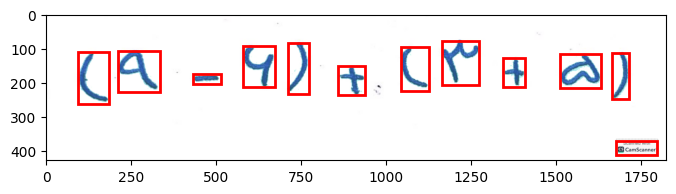

In [8]:
from draw_boxes import draw_boxes
draw_boxes("../dataset/test/images/618.png", test_detections[118]['boxes'])